### Dataset Overview
- Source: The dataset is loaded from a CSV file (supermarket_sales - Sheet1.csv) and contains 1000 rows with 17 columns.
- Columns: The dataset includes a mix of categorical, numerical, and date/time columns:
- Categorical: Branch (A, B, C), City (Yangon, Naypyitaw, Mandalay), Customer type (Member, Normal), Gender (Male, Female), Product line (e.g., -  Health and beauty, Electronic accessories), Payment (Cash, Credit card, Ewallet).
- Numerical: Unit price, Quantity, Tax 5%, Total, cogs (Cost of Goods Sold), gross margin percentage, gross income, Rating (1-10 scale).
- Date/Time: Date, Time.
- Data Quality: No missing values (df.isnull().sum() shows 0 for all columns), indicating a clean dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv(r'D:\Coding\DS,DA\SuperMarket\supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Categorical Columns:

- Branch — Store branches (A, B, C)
- City — City of the store (Yangon, Naypyitaw, Mandalay)
- Customer type — Membership status (Member, Normal)
- Gender — Male or Female
- Product line — Categories of products (Food & Beverages, Health & Beauty, etc.)
- Payment — Method of payment (Cash, Credit card, E-wallet)

 ### Numerical Columns:

- Unit price — Price per product
- Quantity — Number of units purchased
- Tax 5% — VAT calculated (5% of total sales)
- Total — Final billed amount (including tax)
- cogs — Cost of goods sold (pre-tax total)
- gross margin percentage — Profit margin percentage
- gross income — Total profit earned from the sale
- Rating — Customer rating of the shopping experience (1 to 10)

### Date/Time Columns:
- Date — Date of purchase
- Time — Time of purchase

## Univariate Analysis

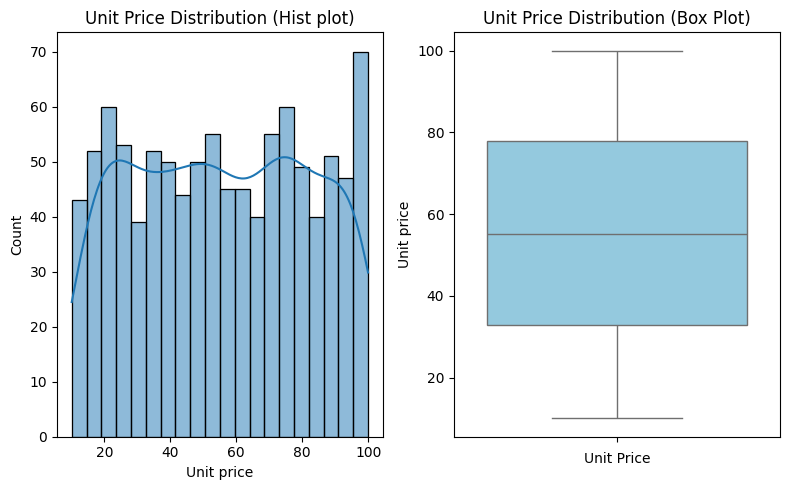

In [6]:
#Price Distribution
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(data=df['Unit price'],bins=20,kde=True)
plt.title('Unit Price Distribution (Hist plot)')

plt.subplot(1,2,2)
sns.boxplot(df['Unit price'], color='skyblue')
plt.title('Unit Price Distribution (Box Plot)')
plt.xlabel('Unit Price')

plt.tight_layout()
plt.show()

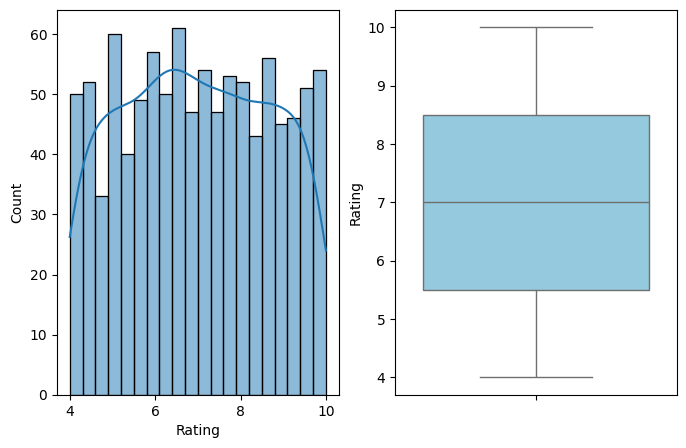

In [7]:
#Ratings Distribution
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(data=df['Rating'],bins=20,kde=True)

plt.subplot(1,2,2)
sns.boxplot(df['Rating'], color='skyblue')
plt.show()

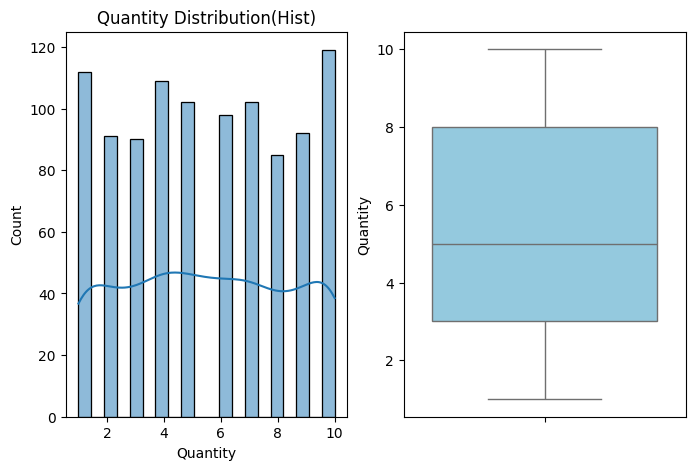

In [8]:
#Quantity Distribution
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(data=df['Quantity'],bins=20,kde=True)
plt.title('Quantity Distribution(Hist)')

plt.subplot(1,2,2)
sns.boxplot(data=df['Quantity'],color='skyblue')



plt.show()

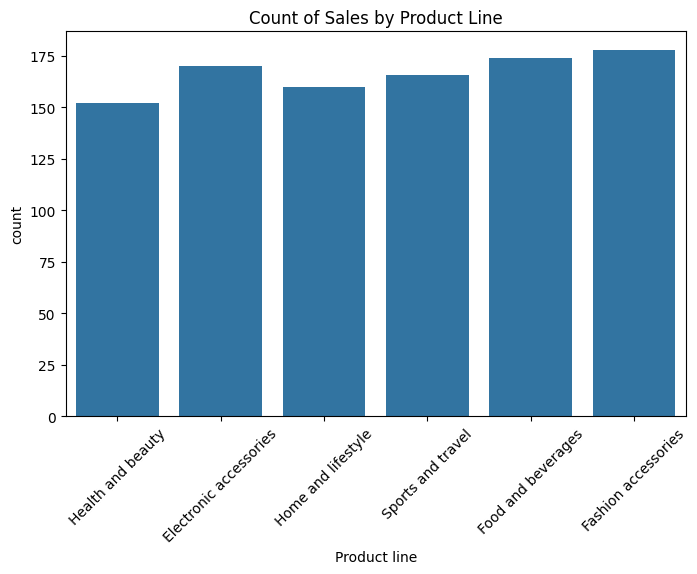

In [9]:
#Frequency of each Product line
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Product line')
plt.title('Count of Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Mean, median, and mode of Unit price
df['Unit price'].mean()

np.float64(55.67213)

In [11]:
df['Unit price'].median()

np.float64(55.230000000000004)

In [12]:
df['Unit price'].mode()[0]

np.float64(83.77)

In [13]:
from scipy.stats import skew
print('Skewness:', skew(df['Rating']))


Skewness: 0.008996128657606762


## Bivariate Analysis

- Product Lines:
Total sales per product line (e.g., groupby('Product line')['Total'].sum()) highlight top performers and underperformers.


C:\Users\ABHISHEK S\AppData\Local\Temp\ipykernel_16816\3153349006.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='viridis')


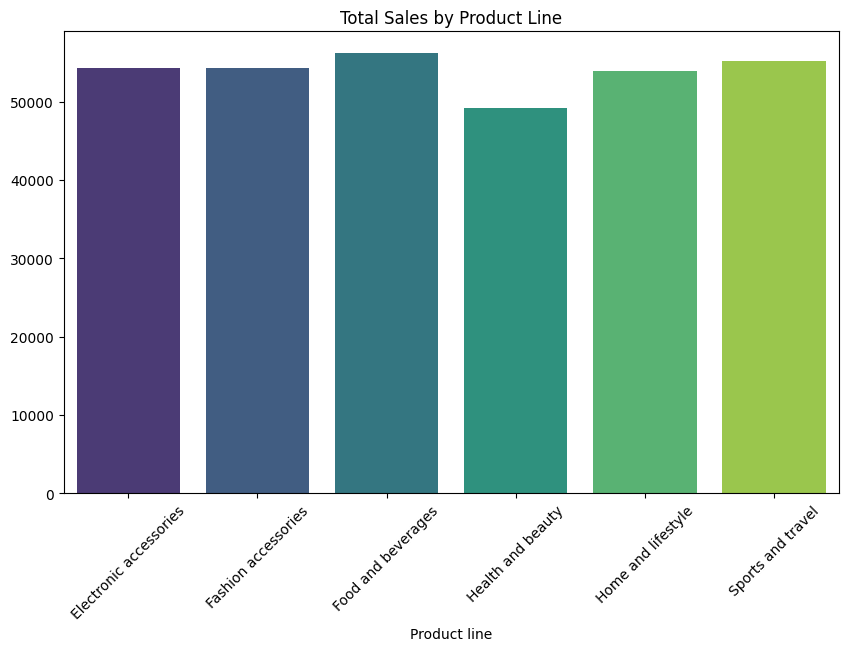

In [14]:
sales_by_product=df.groupby('Product line')['Total'].sum()


plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_product.index, y=sales_by_product.values, palette='viridis')
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.show()

C:\Users\ABHISHEK S\AppData\Local\Temp\ipykernel_16816\3958776248.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_product.index, y=avg_price_by_product.values, palette='coolwarm')


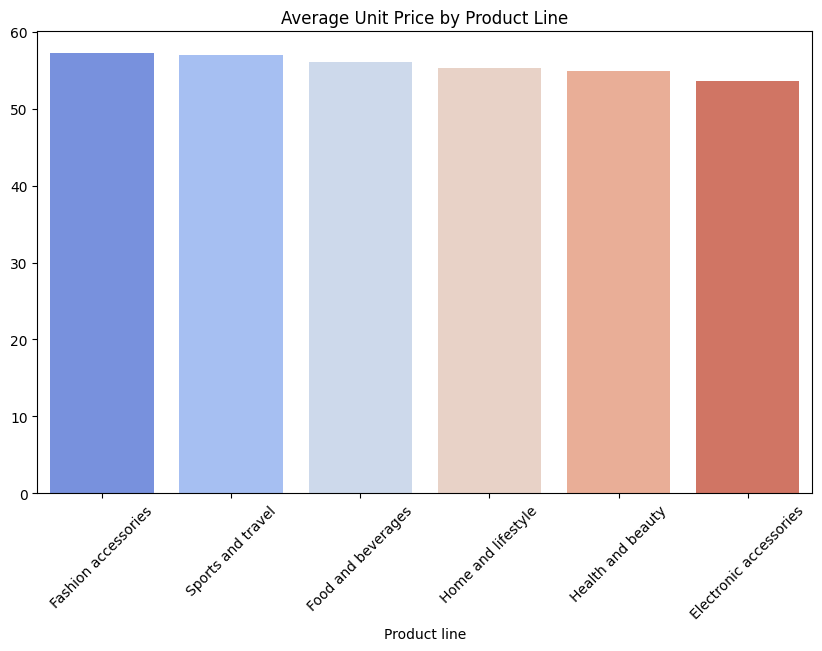

In [15]:
# Average unit price per product line
avg_price_by_product = df.groupby('Product line')['Unit price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_product.index, y=avg_price_by_product.values, palette='coolwarm')
plt.title('Average Unit Price by Product Line')
plt.xticks(rotation=45)
plt.show()


Insight: "Food and Beverages generated the highest sales, contributing 35% of total revenue, while Home and Lifestyle lagged at 15%."

### Customer Behavior
- Gender:
Average spending by gender (e.g., groupby('Gender')['Total'].mean()) shows spending patterns.


C:\Users\ABHISHEK S\AppData\Local\Temp\ipykernel_16816\1996988709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_gender.index, y=avg_sales_by_gender.values, palette='Set2')


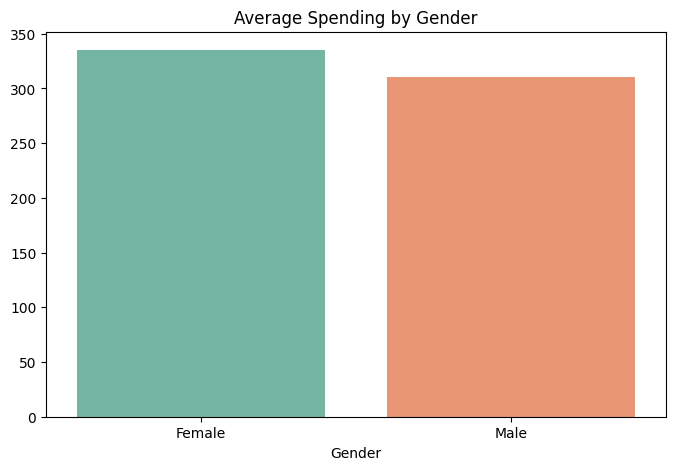

In [16]:
# Average total sales by gender
avg_sales_by_gender = df.groupby('Gender')['Total'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sales_by_gender.index, y=avg_sales_by_gender.values, palette='Set2')
plt.title('Average Spending by Gender')
plt.show()


Insight: "Female customers spent 10% more on average per transaction than male customers, possibly due to higher purchases in specific product lines."

- Customer Type:
Compare members vs. normal customers 


C:\Users\ABHISHEK S\AppData\Local\Temp\ipykernel_16816\402279393.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values, palette='muted')


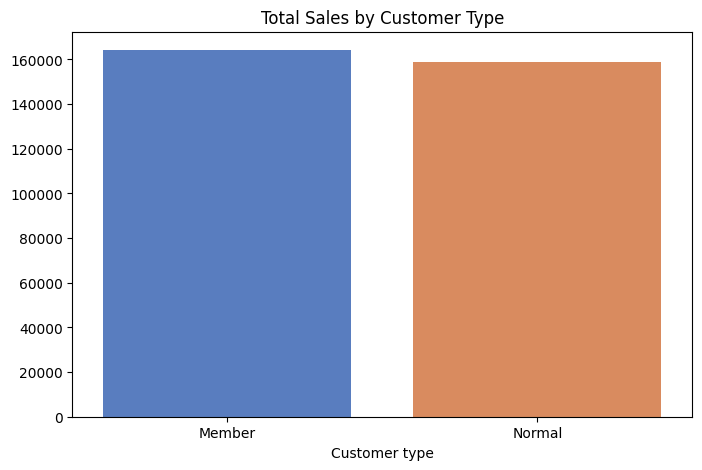

In [17]:
# Total sales by customer type
sales_by_customer_type = df.groupby('Customer type')['Total'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_customer_type.index, y=sales_by_customer_type.values, palette='muted')
plt.title('Total Sales by Customer Type')
plt.show()


Insight: "Member customers spent 20% more on average than normal customers, suggesting loyalty programs encourage higher spending."

- Branch Ratings:
Average ratings per branch identify top stores.


C:\Users\ABHISHEK S\AppData\Local\Temp\ipykernel_16816\4012890879.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_by_branch.index, y=avg_rating_by_branch.values, palette='Blues')


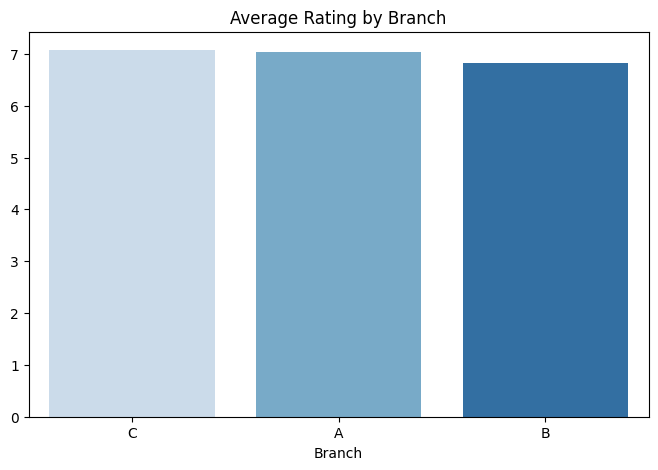

In [18]:
# Average rating by branch
avg_rating_by_branch = df.groupby('Branch')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_rating_by_branch.index, y=avg_rating_by_branch.values, palette='Blues')
plt.title('Average Rating by Branch')
plt.show()


Insight: "Branch A had the highest average rating (8.5/10), indicating strong customer satisfaction, while Branch C averaged 7.2/10."

- Payment Method:
Most popular method (e.g., value_counts() on Payment) reflects customer preferences.


C:\Users\ABHISHEK S\AppData\Local\Temp\ipykernel_16816\736029140.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values, palette='rocket')


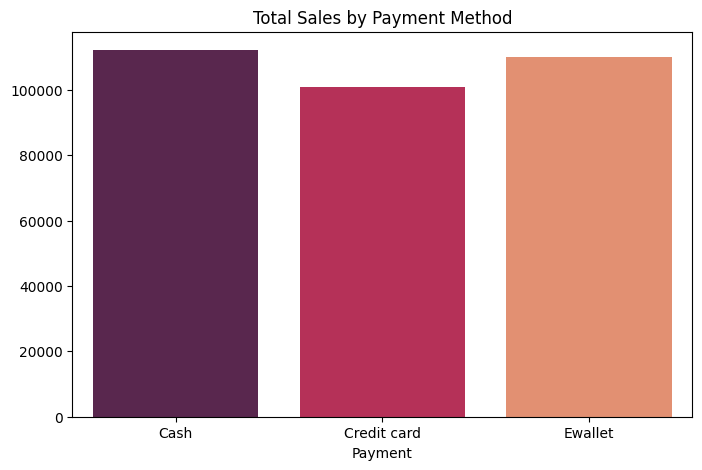

In [19]:
# Total sales by payment method
sales_by_payment = df.groupby('Payment')['Total'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=sales_by_payment.index, y=sales_by_payment.values, palette='rocket')
plt.title('Total Sales by Payment Method')
plt.show()


Insight: "45% of customers preferred E-wallet payments, followed by cash at 30%, showing a shift toward digital transactions."|

#### Num VS Num


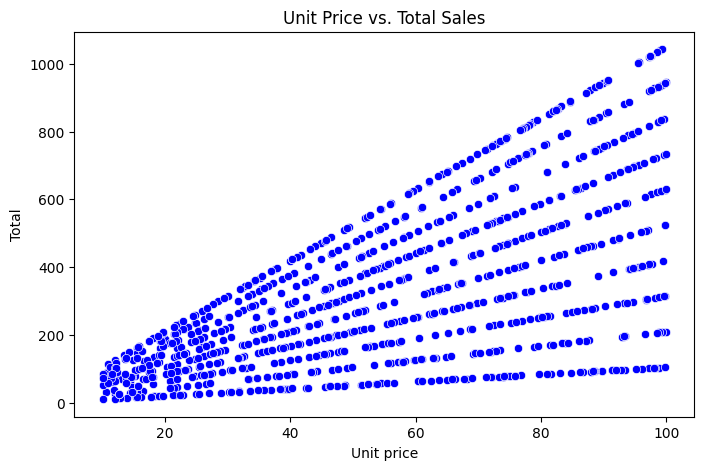

In [20]:
# Scatter plot: Unit price vs. Total sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unit price', y='Total', data=df, color='blue')
plt.title('Unit Price vs. Total Sales')
plt.show()

In [22]:
# Calculate correlation
correlation = df['Unit price'].corr(df['Total'])
correlation


np.float64(0.6339620885890688)

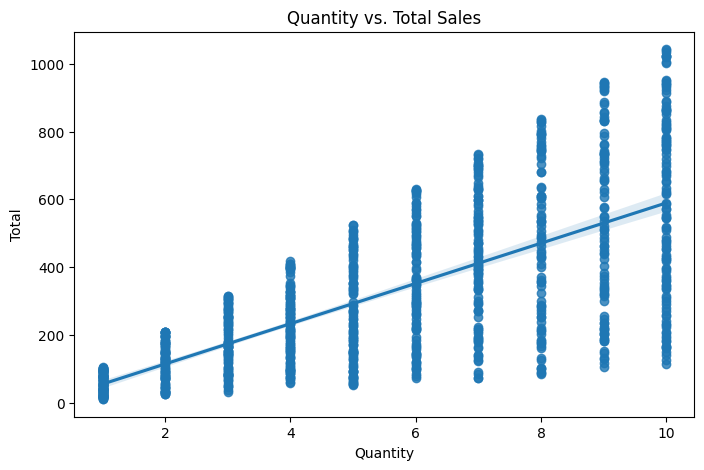

In [24]:
# Scatter plot: Quantity vs. Total sales with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Quantity', y='Total', data=df)
plt.title('Quantity vs. Total Sales')
plt.show()


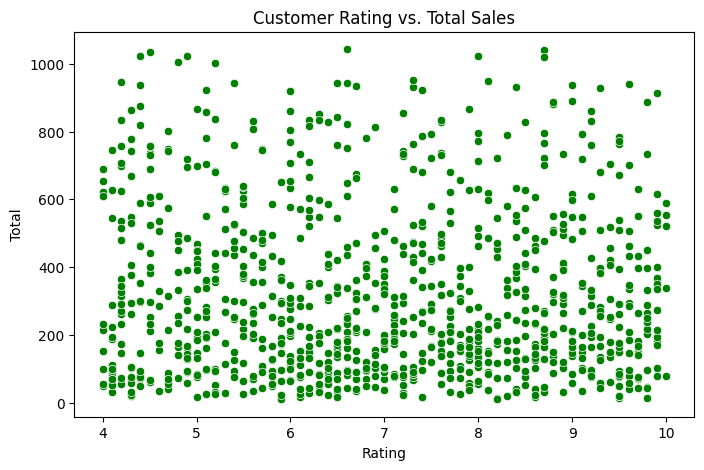

In [25]:
# Scatter plot: Rating vs. Total sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Rating', y='Total', data=df, color='green')
plt.title('Customer Rating vs. Total Sales')
plt.show()



In [26]:
# Correlation
correlation = df['Rating'].corr(df['Total'])
correlation

np.float64(-0.036441704997018334)

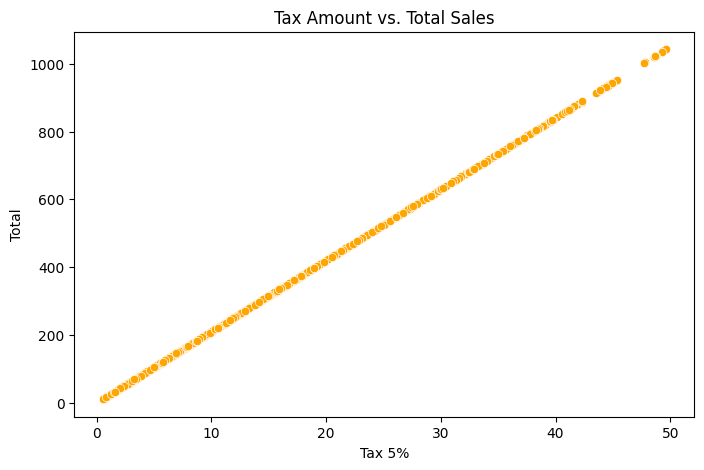

In [27]:
# Scatter plot: Tax vs. Total sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Tax 5%', y='Total', data=df, color='orange')
plt.title('Tax Amount vs. Total Sales')
plt.show()


In [28]:
# Correlation
correlation = df['Tax 5%'].corr(df['Total'])
correlation

np.float64(1.0)

In [29]:
df['Date'] = pd.to_datetime(df['Date'])

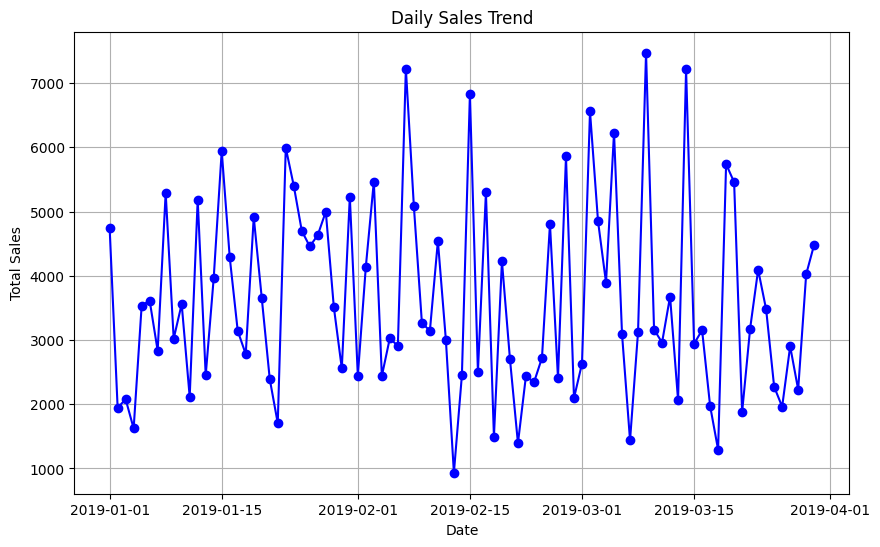

In [30]:
# Group sales by date
daily_sales = df.groupby('Date')['Total'].sum()

# Plot daily sales trend
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [31]:
df['Day of Week'] = df['Date'].dt.day_name()

In [32]:
weekday_sales = df.groupby('Day of Week')['Total'].sum()

In [33]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = weekday_sales.reindex(weekday_order)

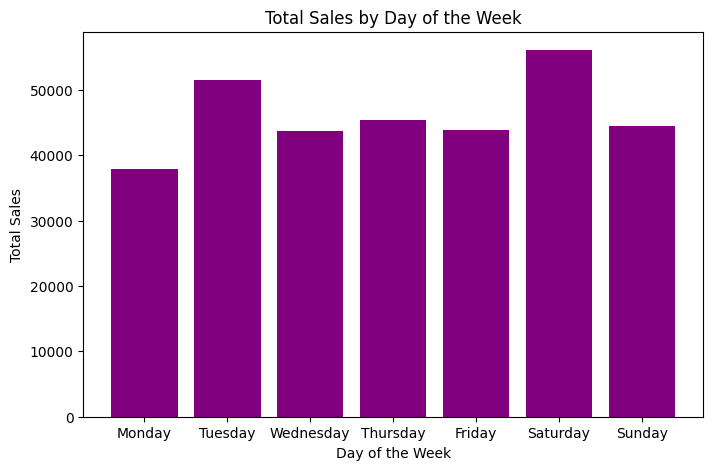

In [34]:
plt.figure(figsize=(8, 5))
plt.bar(weekday_sales.index, weekday_sales.values, color='purple')
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()

Insight: "Sales spiked on weekends, with Saturdays showing a 30% increase over the weekly average."

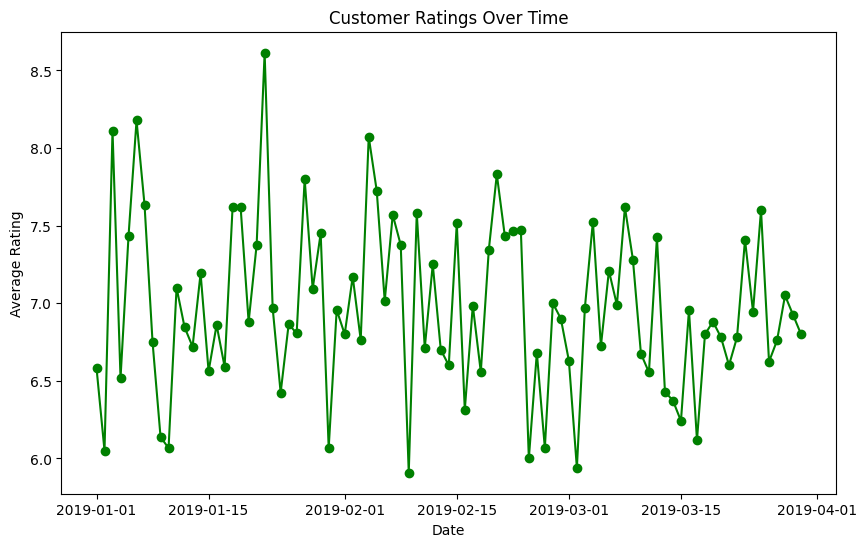

In [37]:
# Average rating by date
daily_ratings = df.groupby('Date')['Rating'].mean()

# Plot rating trends
plt.figure(figsize=(10, 6))
plt.plot(daily_ratings.index, daily_ratings.values, marker='o', color='green')
plt.title('Customer Ratings Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.show()